In [1]:
#TODO 
#Add more comments/documentation
#Explicity show the numerical method I used
#add some visualization 

# Gambling! YAY!
I will be analyzing multiple gambling strategies using 3 numerical methods:
* **Monte Carlo:** by repeating a random experiment many times to estimate an expected outcome.
* **Pseudo random number generator:** in Monte Carlo 

The gambling strategies include:
* **Martingale strategy**
    - doubling your bet everytime you lose 
    - EX: initial bet = 10 baht, future bets (10, 20, 40, 80, ...)
    - when you win go back to your original bet
    
* **Paroli strategy (The "Reverse Martingale")**
    - reverse of martingale, doubling your bet everytime you **win**, but stop increasing at 3 wins in a row
    - EX: initial bet = 10 baht, future bets (10, 20, 40, 80, ...)


* **Fibonacci gambling strategy**
    - betting using the fibonacci sequence
    - if you lose move 1 step to the right of the fibo sequence, if you win move **2 steps to the left**.
    - EX: (1, 1, 2, 3, 5, 8)  initial bet = 10 baht, lose then move right so bet 10 again, lose again, move left again so bet 20
    
* **D'Alembert strategy**
    - gradually increasing your bet as you lose, and vice versa 
    - EX: inititial bet = 10, lose bet becomes 20, lose again bet becomes 30, win bet becomes 20

## Setting up the gambling function

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from numba import jit
import numpy as np
import math
import random
from matplotlib.ticker import StrMethodFormatter

#European cause slots = 37 vs American slots = 38, two house 0s 
#chance of winning = 48.65%

@jit(nopython=True)
def roulete_red_black() -> bool:
    result = np.random.randint(0, 37) 
    if result == 0: # house edge 
        return False
    elif result % 2 == 0:
        return False
    else:
        return True
    

## 0. Jesus Take the wheel (normal gambling)
<img src="gamba-xqc.gif" width="300" height="200">

total bets: 100
Total Profit: -6000
WE LOST NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO!!!


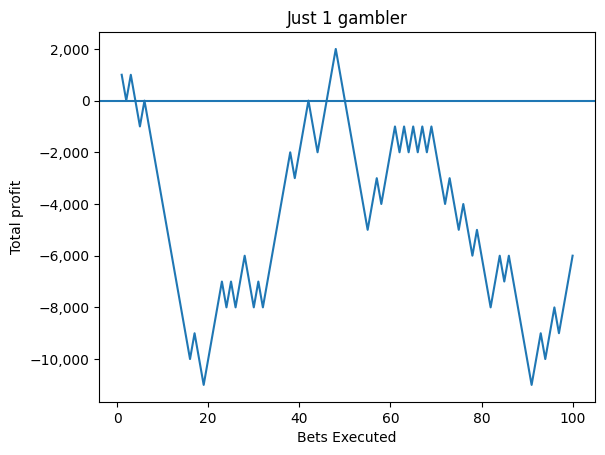

In [3]:
def normalStrategy(startingBet: int, numberOfBets:int ):
    betcount = np.arange(1, numberOfBets + 1)
    profits = []
    startingBetAmount = startingBet
    currentBet = startingBetAmount
    profit = 0 

    for i in range(len(betcount)):
        if (roulete_red_black()): # win
            profit += currentBet
        else: # lose
            profit -= currentBet
        profits.append(profit)

    print("total bets: " + str(len(betcount)))
    print("Total Profit: " + str(profit))
    plt.plot(betcount, profits)
    plt.xlabel("Bets Executed")
    plt.ylabel("Total profit")
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.title("Just 1 gambler")
    plt.axhline(0)
    return profit


profit = normalStrategy(1000, 100)
if (profit > 0):
    print("WE WON!!!! :)")
else:
    print("WE LOST NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO!!!")


## 0.1 Monte Carlo simulation 


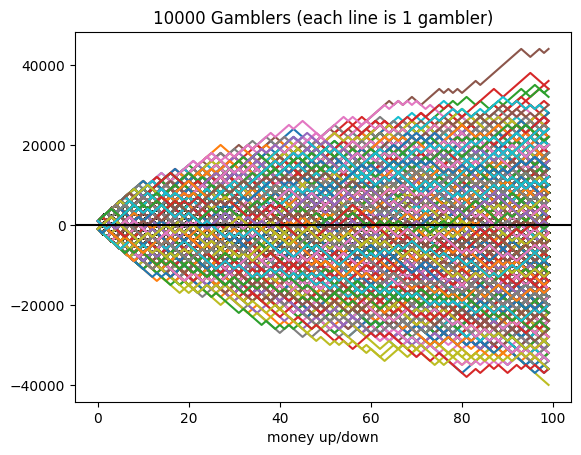

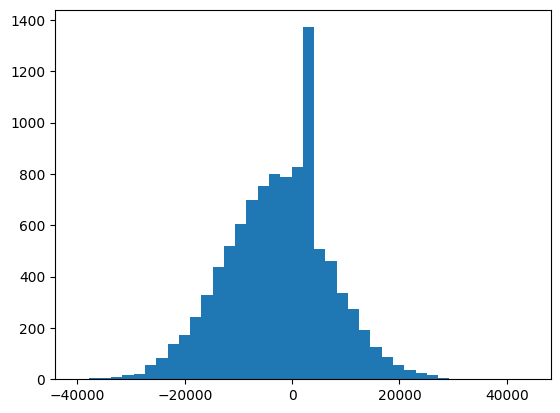

winners : 4326
losers  : 5674
Expected gain/loss using 1000 baht bets, after 100 gambles: -0.27544
Median: -2000.0


In [4]:
def normalStrategy(startingBet: int, numberOfBets:int ):
    betcount = np.arange(1, numberOfBets + 1)
    profits = []
    startingBetAmount = startingBet
    currentBet = startingBetAmount
    profit = 0 
    moneyNeeded = 0

    for i in range(len(betcount)):
        if (profit - currentBet) < moneyNeeded:
            moneyNeeded = profit - currentBet

        if (roulete_red_black()): # win
            profit += currentBet
        else: # lose
            profit -= currentBet
        profits.append(profit)
    return profits, abs(moneyNeeded)

bets = 100
initialAmount = 1000
player_num = 10000
players = []
for i in range(player_num):
    profits, moneyNeeded = normalStrategy(initialAmount, bets)
    players.append(profits)
    betsTracker = np.arange(0, bets)
    plt.plot(betsTracker, players[i])
plt.title(str(player_num) + " Gamblers (each line is 1 gambler)")
plt.xlabel("bets executed")
plt.xlabel("money up/down")
plt.axhline(0, color = 'black')
plt.show()



plt.hist([player[-1] for player in players], bins=40 );
#plt.axvline(0, color = "black");
plt.show()

numberOfLosers = 0
for player in players:
    if (player[-1] < 0):
        numberOfLosers += 1

numberOfWinners = player_num - numberOfLosers
print("winners : " + str(numberOfWinners))
print("losers  : " + str(numberOfLosers))

final_profits = [player[-1] for player in players]
average = np.mean(final_profits)

print("Expected gain/loss using " + str(initialAmount) + " baht bets, after " + str(bets) + " gambles: " +  str(average/player_num))
print("Median:", np.median(final_profits))


<img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> <img src="gamba-xqc.gif" width="60" height="40"> 


## 0.2 bets vs chance of winning (thoughtless gambling)

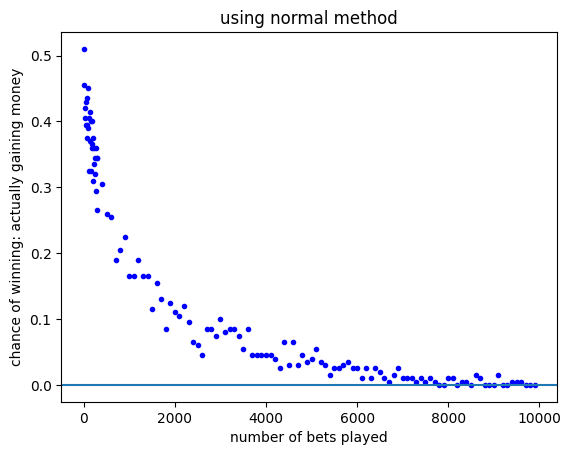

In [5]:

def normal_strategy_winners_VS_bets(startingBet: int, numberOfBets:int ):
    betcount = np.arange(1, numberOfBets + 1)
    startingBetAmount = startingBet
    currentBet = startingBetAmount
    profit = 0 

    for i in range(len(betcount)):
        if (roulete_red_black()): # win
            profit += currentBet
        else: # lose
            profit -= currentBet
    return profit > 0

# more detailed to see the lower numbers clearer 
bet_numbers = np.arange(1, 300, 10)
initialAmount = 1
player_num = 200
for bet_number in bet_numbers:
    winners = 0
    losers = 0
    for i in range(player_num):
        if normal_strategy_winners_VS_bets(initialAmount, bet_number):
            winners += 1
        else:
            losers += 1
    plt.plot(bet_number, winners/player_num, '.' , color = "blue")

# less detailed to see the overall direction 
bet_numbers = np.arange(300, 10000, 100)
initialAmount = 1
player_num = 200
for bet_number in bet_numbers:
    winners = 0
    losers = 0
    for i in range(player_num):
        if normal_strategy_winners_VS_bets(initialAmount, bet_number):
            winners += 1
        else:
            losers += 1
    plt.plot(bet_number, winners/player_num, '.' , color = "blue")

plt.ylabel("chance of winning: actually gaining money")
plt.xlabel("number of bets played")
plt.axhline(0)
plt.title("using normal method")
plt.show()

## 1. Martingale strategy


starting bet amount: 100
total bets: 1,000
Total Profit: 50,800
highest bet: 102,400
Most amount down: -54,100
highest loss streak: 10


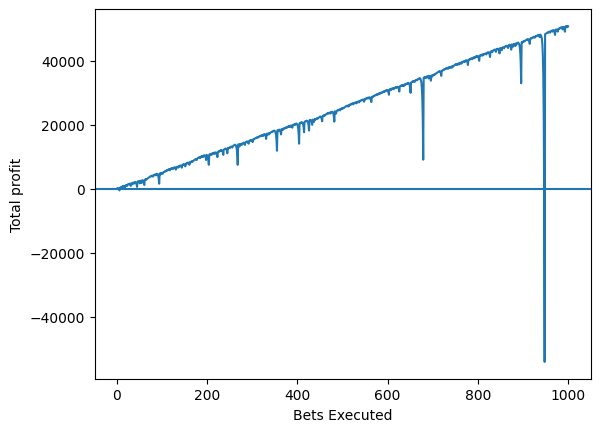

In [6]:

def martingaleStrategy(startingBet: int, numberOfBets:int ):
    betcount = np.arange(1, numberOfBets+1)
    profits = []
    startingBetAmount = startingBet
    currentBet = startingBetAmount
    highestBet = 0 
    profit = 0 
    lowestProfit = 0

    for i in range(len(betcount)):
        if (roulete_red_black()): # win
            profit += currentBet
            currentBet = startingBetAmount
        else: # lose
            profit -= currentBet
            currentBet *= 2

        if profit < lowestProfit:
            lowestProfit = profit

        profits.append(profit)

        if (highestBet < currentBet):
            highestBet = currentBet

    print("starting bet amount: " + f"{startingBet:,}")
    print("total bets: " + f"{len(betcount):,}")
    print("Total Profit: " + f"{profit:,}")
    print("highest bet: " + f"{highestBet:,}" )
    print("Most amount down: " + f"{lowestProfit:,}")
    print("highest loss streak: " + str(int(math.log2(highestBet/startingBet))))


    plt.plot(betcount, profits)
    plt.xlabel("Bets Executed")
    plt.ylabel("Total profit")
    plt.axhline(0)

startingBet = 100
numberOfBets = 1000
martingaleStrategy(startingBet, numberOfBets)


## 1.1 Martingale analysis 

Things you should know 
* every win you get will only profit you your initial bet EX: I lost 8 times in a row and my initital bet was 100 so my bet to win back my losses would be 100 * 2^8 = 25,600

    this huge bet would only profit me my initial bet 

* This strategy actually has a 100% success rate but u have to have an **infinite wallet** 



winners : 1000
losers  : 0
minimum number of bets: 100
maximum number of bets: 120


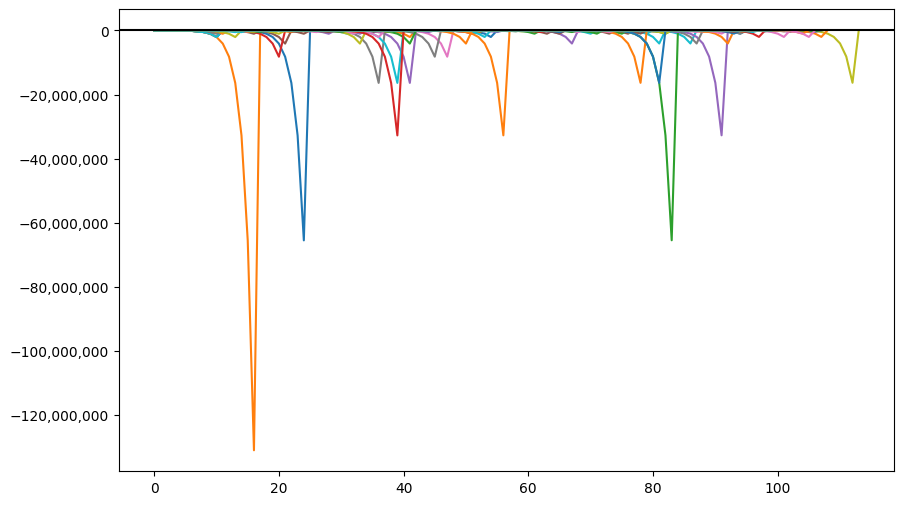

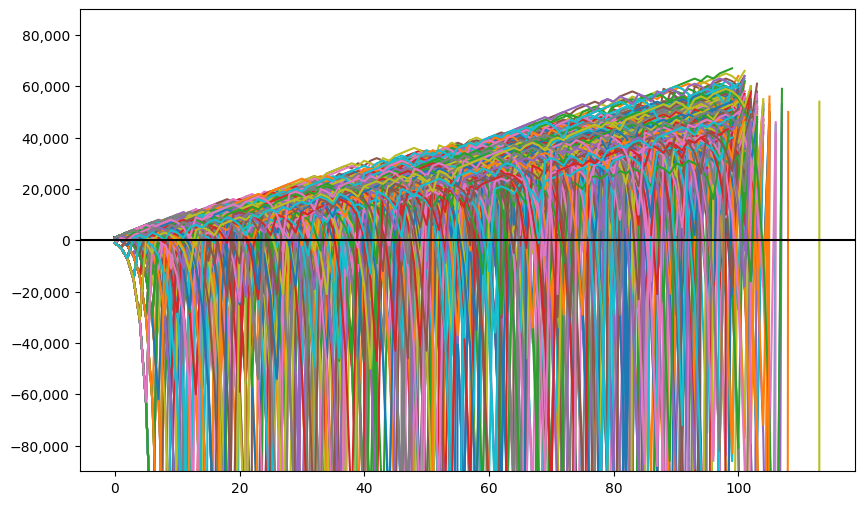

using number of bets: 100-120
Expected gain/loss using 1000 baht bets, after 100 gambles: 49216.0
or 49.22x initial bet


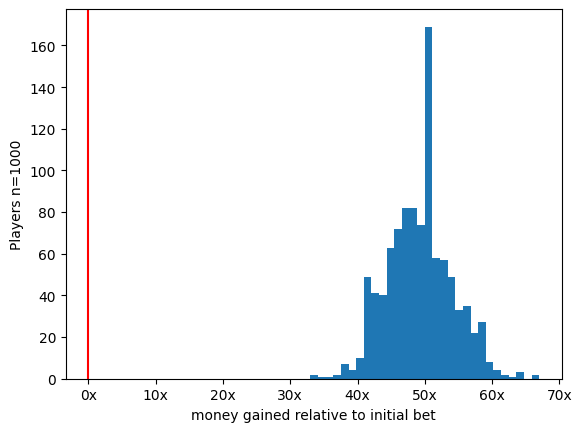

outliers completely mess up histogram


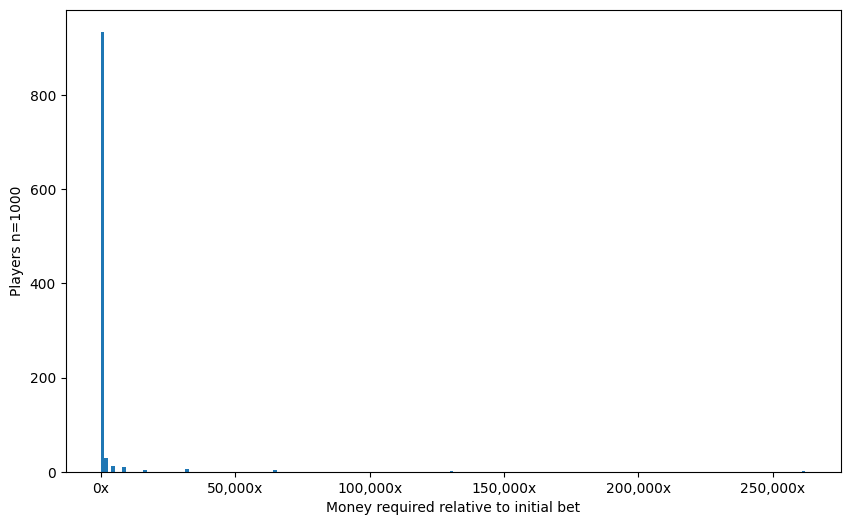

Enhance!


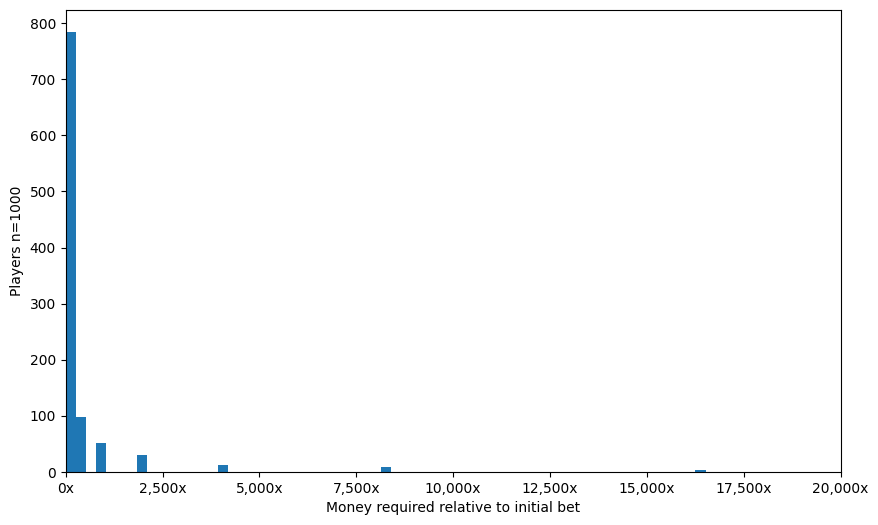

ENHANCE!!!


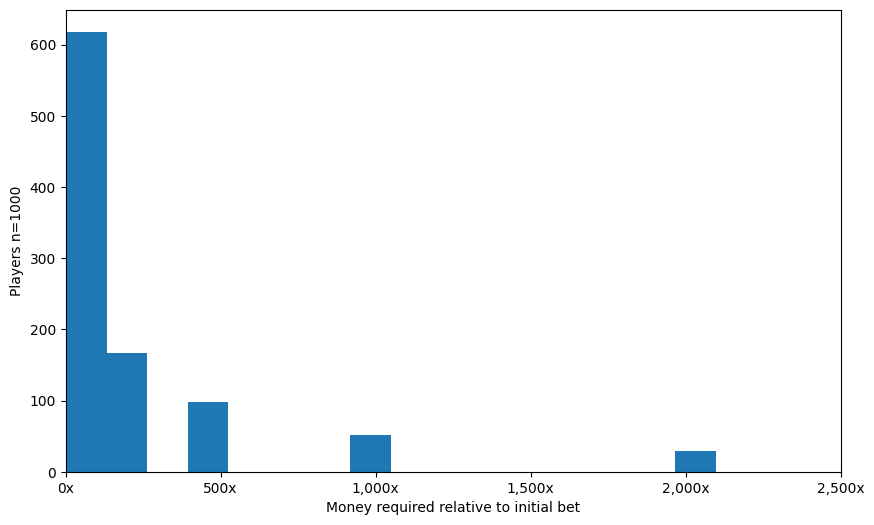

In [7]:
import pandas as pd

# slightly modified so that u dont stop gambling when u are down
@jit(nopython=True)
def modifiedMartingaleStrategy(startingBet: int, min_numberOfBets:int, max_numberOfBets: int):
    profits = []
    startingBetAmount = startingBet
    currentBet = startingBetAmount
    highestBet = 0 
    profit = 0 
    moneyNeeded = 0

    for i in range(1, max_numberOfBets+1):
        if (profit - currentBet) < moneyNeeded:
            moneyNeeded = profit - currentBet
        if (roulete_red_black()): # win
            profit += currentBet
            currentBet = startingBetAmount
        else: # lose
            profit -= currentBet
            currentBet *= 2

        profits.append(profit)

        if (highestBet < currentBet):
            highestBet = currentBet
        
        # if 
        if i >= min_numberOfBets and currentBet == startingBetAmount:
            return profits, abs(moneyNeeded)
        
    return profits, abs(moneyNeeded)

minimumBets = 100
maximumBets = 120
initialAmount = 1000
player_num = 1000
players = []
wallets_required = []
plt.figure(figsize=(10, 6))
for i in range(player_num):

    profits, moneyNeeded = modifiedMartingaleStrategy(initialAmount, minimumBets, maximumBets)
    players.append(profits)
    wallets_required.append(moneyNeeded/initialAmount)
    betsTracker = np.arange(0, len(profits))
    plt.plot(betsTracker, players[i])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.axhline(0, color = 'black')


numberOfLosers = 0
for player in players:
    if (player[-1] < 0):
        numberOfLosers += 1

numberOfWinners = player_num - numberOfLosers
print("winners : " + str(numberOfWinners))
print("losers  : " + str(numberOfLosers))

final_results = [] 
for player in players:
    final_results.append(player[-1])
average_profit = sum(final_results) / len(final_results)

print("minimum number of bets: " + str(minimumBets))
print("maximum number of bets: " + str(maximumBets))

plt.show()

plt.figure(figsize=(10, 6))
for i in range(player_num):
    betsTracker = np.arange(0, len(players[i]))
    plt.plot(betsTracker, players[i])
plt.ylim(-90000, 90000)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.axhline(0, color = 'black')
plt.show()


print("using number of bets: " + str(minimumBets) + "-" + str(maximumBets))
print("Expected gain/loss using " + str(initialAmount) + " baht bets, after " + str(bets) + " gambles: " +  str(average_profit))
print("or " + str(round(average_profit/initialAmount, 2)) + "x initial bet")
plt.hist([player[-1]/initialAmount for player in players], bins=30 );
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))
plt.axvline(0, color = "red");
plt.xlabel("money gained relative to initial bet")
plt.ylabel("Players n=" + str(player_num))
plt.show()

plt.show()


print("outliers completely mess up histogram")
plt.figure(figsize=(10, 6))
plt.hist([wallet for wallet in wallets_required], bins=int(player_num/5))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))
plt.xlabel("Money required relative to initial bet")
plt.ylabel("Players n=" + str(player_num))
plt.show()

print("Enhance!")
plt.figure(figsize=(10, 6))
plt.hist([wallet for wallet in wallets_required], bins=int(player_num))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))
plt.xlim(0, 20000)
plt.xlabel("Money required relative to initial bet")
plt.ylabel("Players n=" + str(player_num))
plt.show()

print("ENHANCE!!!")
plt.figure(figsize=(10, 6))
plt.hist([wallet for wallet in wallets_required], bins=int(player_num*2))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))
plt.xlim(0, 2500)
plt.xlabel("Money required relative to initial bet")
plt.ylabel("Players n=" + str(player_num))
plt.show()

sample size is : 10000 players
Where minimum number of bets is :100
Where maximum number of bets is :130
average winners gain: 49.11x
average losers loss: your entire wallet


,Chance of Winning (%),Money Needed
0,50,106x
1,52,110x
2,54,114x
3,56,118x
4,58,121x
5,60,125x
6,62,205x
7,64,213x
8,66,220x
9,68,226x


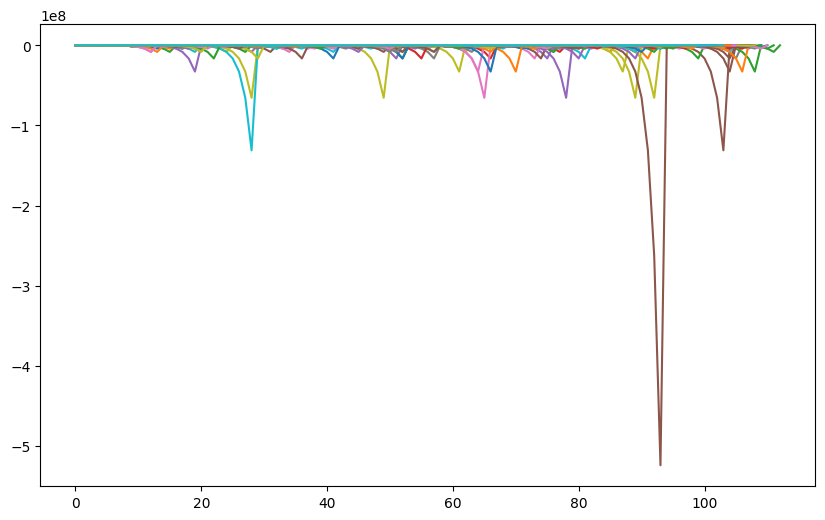

In [8]:
minimumBets = 100
maximumBets = 130
initialAmount = 1000
player_num = 10000

players = []
wallets_required = []
plt.figure(figsize=(10, 6))

for i in range(player_num):
    profits, moneyNeeded = modifiedMartingaleStrategy(initialAmount, minimumBets, maximumBets)
    players.append(profits)
    
    wallets_required.append(abs(moneyNeeded)/initialAmount) 
    
    betsTracker = np.arange(0, len(profits))
    plt.plot(betsTracker, players[i])

chances = np.arange(50, 101, 2)
money_needed = np.percentile(wallets_required, chances)

df = pd.DataFrame({
    'Chance of Winning (%)': chances,
    'Money Needed': money_needed
})

df['Money Needed'] = df['Money Needed'].map('{:,.0f}x'.format)
print("sample size is : " + str(player_num) + " players")
print("Where minimum number of bets is :" + str(minimumBets))
print("Where maximum number of bets is :" + str(maximumBets))

wins = []
loses = []
for player in players:
    if player[-1] > 0:
        wins.append(player[-1])
    else:
        loses.append(player[-1])
print("average winners gain: " + str(round(np.sum(wins)/len(wins)/initialAmount, 2)) + "x")
print("average losers loss: your entire wallet")

df


## 1.2 More bets vs chance of busting?
#### Will our wallet grow large enough to tank the big losses? or will the chance of busting go up by a ton?



* Realistically the sweet spot is either a 512x or 256x wallet your initital bet 
* The only problem is the more bets u do the lower the chance of winning, 
* Let's try with a 512x wallet (1000 baht initial bet, 512,000 baht wallet)
* And 256x wallet (1000 baht initial bet, 256,000 baht wallet)

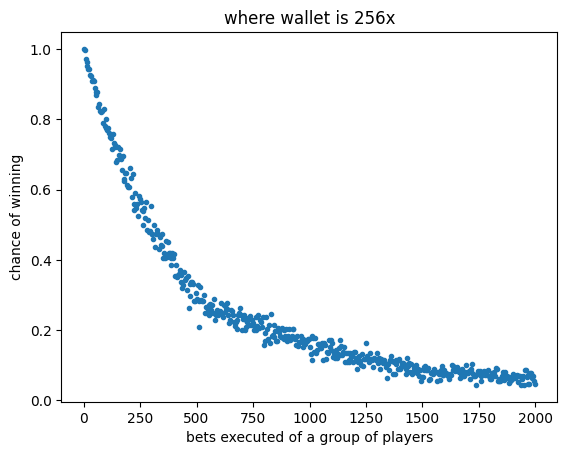

In [ ]:

@jit(nopython=True)
def modded_martingale_bust_vs_bets(startingBet: int, min_numberOfBets:int, max_numberOfBets: int, wallet_ratio:int ):
    startingBetAmount = startingBet
    currentBet = startingBetAmount
    wallet = wallet_ratio * startingBet

    for i in range(1, max_numberOfBets+1):
        if (wallet - currentBet) < 0:
            return False

        if (roulete_red_black()): # win
            wallet += currentBet
            currentBet = startingBetAmount
        else: # lose
            wallet -= currentBet
            currentBet *= 2
        
        # win first then exit
        if i >= min_numberOfBets and currentBet == startingBetAmount:
            return True
        
    return True

@jit(nopython=True)
def modded_martingale_average_wins_vs_bets(startingBet: int, min_numberOfBets:int, max_numberOfBets: int):
    profits = []
    startingBetAmount = startingBet
    currentBet = startingBetAmount
    highestBet = 0 
    profit = 0 

    for i in range(1, max_numberOfBets+1):

        if (roulete_red_black()): # win
            profit += currentBet
            currentBet = startingBetAmount
        else: # lose
            profit -= currentBet
            currentBet *= 2

        profits.append(profit)

        if (highestBet < currentBet):
            highestBet = currentBet
        
        # if 
        if i >= min_numberOfBets and currentBet == startingBetAmount:
            return profits
        
    return profits


initialAmount = 1000
player_num = 500
bet_numbers = np.arange(1, 2000, 4)

#256 Wallet test VS increasing number of bets  
wallet_ratio = 256
ys256 = []
for bet_number in bet_numbers:
    winners = 0
    for i in range(player_num):
        is_won = modded_martingale_bust_vs_bets(initialAmount, bet_number, bet_number*2, wallet_ratio)
        if is_won:
            winners += 1

    ys256.append(winners/player_num)

plt.plot(bet_numbers, ys256, '.')
plt.title("where wallet is " + "256x")
plt.xlabel("bets executed of a group of players")
plt.ylabel("chance of winning")
plt.show()


#512 Wallet test VS increasing number of bets  
wallet_ratio = 512
ys512 = []

wallets_required = []
for bet_number in bet_numbers:
    winners = 0
    for i in range(player_num):
        is_won = modded_martingale_bust_vs_bets(initialAmount, bet_number, bet_number*2, wallet_ratio)
        if is_won:
            winners += 1
    ys512.append(winners/player_num)

#512 Wallet test VS increasing number of bets  
wallet_ratio = 1024
ys1024 = []

wallets_required = []
for bet_number in bet_numbers:
    winners = 0
    for i in range(player_num):
        is_won = modded_martingale_bust_vs_bets(initialAmount, bet_number, bet_number*2, wallet_ratio)
        if is_won:
            winners += 1
    ys1024.append(winners/player_num)

plt.plot(bet_numbers, ys512, '.', color = 'orange')
plt.title("where wallet is " + "512x")
plt.xlabel("bets executed of a group of players")
plt.ylabel("chance of winning")
plt.show()

#512 Wallet test VS increasing number of bets  
wallet_ratio = 8192
ys8192 = []

wallets_required = []
for bet_number in bet_numbers:
    winners = 0
    for i in range(player_num):
        is_won = modded_martingale_bust_vs_bets(initialAmount, bet_number, bet_number*2, wallet_ratio)
        if is_won:
            winners += 1
    ys8192.append(winners/player_num)


plt.plot(bet_numbers, ys512, '.', color = 'orange')
plt.title("where wallet is " + "512x")
plt.xlabel("bets executed of a group of players")
plt.ylabel("chance of winning")
plt.show()

plt.title("256x VS 512x (Higher is better)")
plt.plot( bet_numbers, ys512, '.', label="512x Wallet" , color = 'orange') 
plt.plot( bet_numbers, ys256, '.', label="256x Wallet")
plt.legend();
plt.xlabel("bets executed of a group of players")
plt.ylabel("chance of winning")
plt.show()

plt.title("256x VS 512x VS 1024x (Higher is better)")
plt.plot( bet_numbers, ys512, '.', label="512x Wallet" , color = 'orange') 
plt.plot( bet_numbers, ys256, '.', label="256x Wallet")
plt.plot( bet_numbers, ys1024, '.', label="1024x Wallet", color = 'green')
plt.legend();
plt.xlabel("bets executed of a group of players")
plt.ylabel("chance of winning")
plt.show()

ys_winner_money = []

for bet_number in bet_numbers:
    avg_winners_profits = 0
    winner_group = 0
    for i in range(player_num):
        profits = modded_martingale_average_wins_vs_bets(initialAmount, bet_number, bet_number*2,)
        if (profits[-1] > 0):
            winner_group += 1
            avg_winners_profits += profits[-1]
    ys_winner_money.append(avg_winners_profits/winner_group/initialAmount)

plt.title("average/estimated profits IF u survived")
plt.plot( bet_numbers, ys_winner_money, '.', label="estimated profit if u survive", color = "black" )
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))
plt.legend();
plt.xlabel("bets executed of a group of players")
plt.ylabel("chance of losing")
plt.show()

ys_money_normalized = ys_winner_money / np.max(ys_winner_money)

plt.title("profit growth trend VS number of bets")
plt.plot( bet_numbers, ys512, '.', label="512x Wallet" , color = 'orange') 
plt.plot( bet_numbers, ys256, '.', label="256x Wallet")
plt.plot( bet_numbers, ys1024, '.', label="1024x Wallet", color = 'green')
plt.plot( bet_numbers, ys8192, '.', label="8192x Wallet", color = 'purple')
plt.plot( bet_numbers, ys_money_normalized, '.', label="estimated profit if u survive", color = "black")

plt.legend();
plt.xlabel("bets executed of a group of players")
plt.ylabel("chance of winning")
plt.show()

We can see that if u survive your profit will almost definitely be the equation: profit = 1.5* (initial_anchor_bet) * (bet_executed)


## 1.3 Expected Value of martingale with different bet sizes 
* so (chance of winning TIMES estimated profit) - (chance of losing TIMES your entire wallet)VS bets 
* EV = (p * estimated profit) - (not_p * your entire wallet)

the house edge will always win, especially with expected value


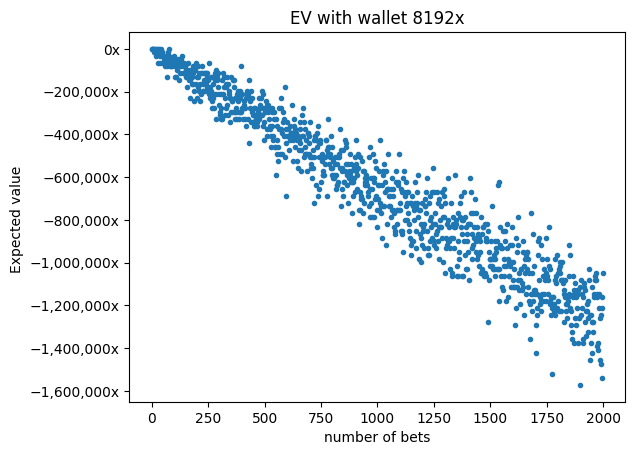

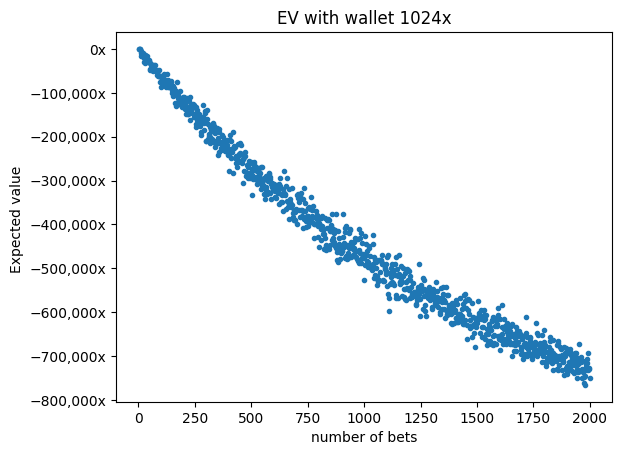

In [ ]:
print("the house edge will always win, especially with expected value")
arr_money = np.array(ys_winner_money)
arr_win_chance = np.array(ys8192)

wallet_loss = 8192  * initialAmount   # The amount lost if you bust
prob_lose = 1.0 - arr_win_chance    # The chance of busting

ev_8192 = (arr_money * arr_win_chance) - (wallet_loss * prob_lose)

plt.plot(bet_numbers, ev_8192, '.' )
plt.title("EV with wallet 8192x")
plt.xlabel("number of bets")
plt.ylabel("Expected value ")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))

plt.show()

arr_money = np.array(ys_winner_money)
arr_win_chance = np.array(ys1024)

wallet_loss = 1024  * initialAmount   # The amount lost if you bust
prob_lose = 1.0 - arr_win_chance    # The chance of busting

ev_1024 = (arr_money * arr_win_chance) - (wallet_loss * prob_lose)

plt.plot(bet_numbers, ev_1024, '.' )
plt.title("EV with wallet 1024x")
plt.xlabel("number of bets")
plt.ylabel("Expected value ")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))
plt.show()

## 1.3 Conclusion 
* Don't gamble
* you are playing a losing game and will lose in the long run

## 2. Paroli strategy (The "Reverse Martingale")

total bets: 100
Total Profit: -14000
Most amount of money down: -20000 baht
Money actually needed: 21000 baht
highest win streak: 3.0


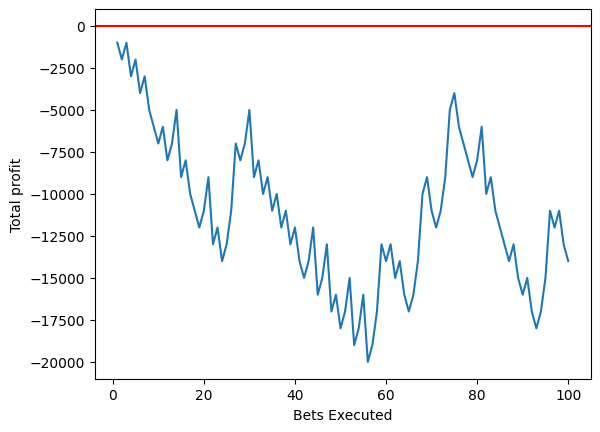

In [ ]:

numberOfBets = 100
profits = []
startingBetAmount = 1000
currentBet = startingBetAmount
highestBet = 0 
profit = 0 
lowestProfit = 0
moneyNeeded = 0

for i in range(numberOfBets):
    if (profit - currentBet) < moneyNeeded:
        moneyNeeded = profit - currentBet
    if (roulete_red_black()): # win
        profit += currentBet
        currentBet *= 2 

    else: # lose 
        profit -= currentBet
        currentBet = startingBetAmount


    if profit < lowestProfit:
        lowestProfit = profit
        
    profits.append(profit)

    if currentBet > highestBet:
        highestBet = currentBet

    # stop wins
    if (currentBet == startingBetAmount * (2**3)):
        currentBet = startingBetAmount


print("total bets: " + str(len(profits)))
print("Total Profit: " + str(profit))
print("Most amount of money down: " + str(lowestProfit) + " baht")
print("Money actually needed: " + str(abs(moneyNeeded)) + " baht")
print("highest win streak: " + str(math.log2(highestBet/startingBetAmount)))
plt.plot(np.arange(1, len(profits)+1), profits)
plt.xlabel("Bets Executed")
plt.ylabel("Total profit")
plt.axhline(0, color="red")
plt.show()

    


## 2.1 Modified Paroli (stop when ur ahead)

total bets: 43
Total Profit: 8000
Money actually needed: 24000 baht


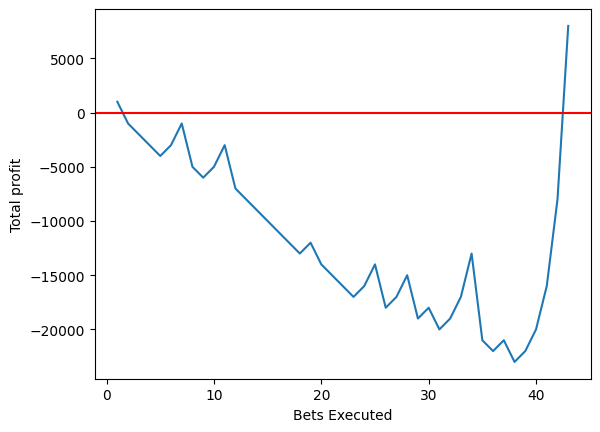

In [ ]:

@jit(nopython=True)
def modded_paroli_strat(startingBet: int, min_numberOfBets: int, max_numberOfBets: int):
    profits = []
    startingBetAmount = startingBet
    currentBet = startingBetAmount
    highestBet = 0 
    profit = 0 
    moneyNeeded = 0

    for i in range(1, max_numberOfBets+1):
        if (profit - currentBet) < moneyNeeded:
            moneyNeeded = profit - currentBet

        if (roulete_red_black()): # win
            profit += currentBet
            currentBet *= 2 
        else: # lose 
            profit -= currentBet
            currentBet = startingBetAmount

        if (highestBet < currentBet):
            highestBet = currentBet

        profits.append(profit)

        # Stop while ahead
        if (profit > startingBetAmount and currentBet >= startingBetAmount * (2**5)):
            return profits, abs(moneyNeeded)
        
        # Stop if bet reaches some high number
        condition_cap = (currentBet == startingBetAmount * (2**7))

        if i >= min_numberOfBets and condition_cap:
            return profits, abs(moneyNeeded)
            
    return profits, abs(moneyNeeded)

initialAmount = 1000
min_bets = 10
max_bets = 200

profits, moneyNeeded = modded_paroli_strat(initialAmount, min_bets, max_bets)

print("total bets: " + str(len(profits)))
print("Total Profit: " + str(profits[-1]))
print("Money actually needed: " + str(moneyNeeded) + " baht")

plt.plot(np.arange(1, len(profits)+1), profits)
plt.xlabel("Bets Executed")
plt.ylabel("Total profit")
plt.axhline(0, color="red")
plt.show()

## 2.2 Paroli analysis 


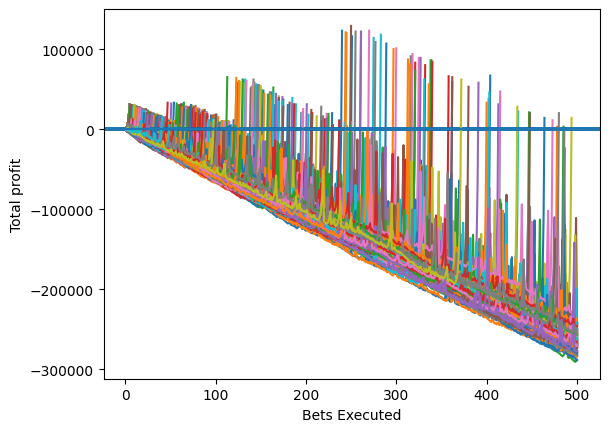

winners: 866
losers : 134
averge winners gain: 23.86x
Median gain/loss using 1000 baht bets: Median: 19000.0
averge losers loss: -261.12x
average number of bets actually done :127.959
median number of bets done:  45.0


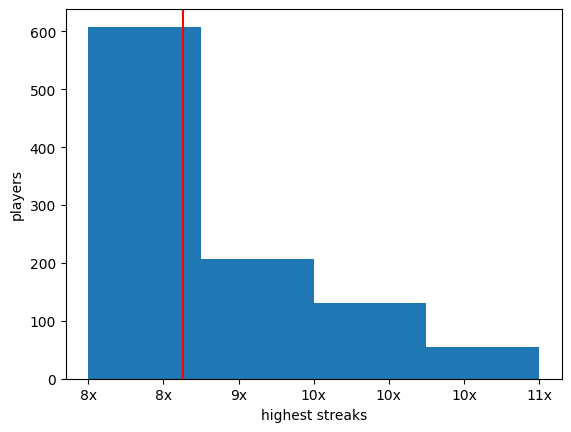

In [ ]:

def modded_paroli_simulation(players: int, max_number_of_bets:int, starting_bet: int):
    highestBets = []
    moneyNeeded = 0
    simulations = []

    for i in range(players):
        profits = []
        currentBet = starting_bet
        highestBet = 0 
        profit = 0 
        lowestProfit = 0

        for i in range(max_number_of_bets):
            if (profit - currentBet) < moneyNeeded:
                moneyNeeded = profit - currentBet
            if (roulete_red_black()): # win
                profit += currentBet
                currentBet *= 2 

            else: # lose 
                profit -= currentBet
                currentBet = starting_bet


            if profit < lowestProfit:
                lowestProfit = profit

            if (currentBet > highestBet):
                highestBet = currentBet

            profits.append(profit)
            
            #stop while ahead
            if (profit > starting_bet and currentBet >= starting_bet * (2**5)):
                break

                
        highestBets.append(int(math.log2(highestBet/startingBet)))
        simulations.append(profits)
    return simulations, highestBets







starting_bet = 1000
players = 1000
max_bets = 500

sims, streaks = modded_paroli_simulation(players, max_bets, starting_bet)

for sim in sims:
    plt.plot(np.arange(1, len(sim)+1), sim)
    plt.xlabel("Bets Executed")
    plt.ylabel("Total profit")
    plt.axhline(0)

plt.show()
unique_items = set(streaks)
plt.hist([high for high in streaks], bins=len(unique_items));
plt.axvline(np.sum(streaks)/len(streaks), color = 'red')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))
plt.xlabel("highest streaks")
plt.ylabel("players");

wins = []
losses = []
number_of_bets = []
for simulation in sims:
    number_of_bets.append(len(simulation))
    if simulation[-1] >= 0:
        wins.append(simulation[-1])
    else: 
        losses.append(simulation[-1])

print("winners: " + str(len(wins)))  
print("losers : " + str(len(losses)))      
print("averge winners gain: " + str(round(np.sum(wins)/len(wins)/starting_bet, 2)) + "x")
print("Median gain/loss using " + str(initialAmount) + " baht bets: " + "Median:", np.median(wins + losses) )
print("averge losers loss: " + str(round(np.sum(losses)/len(losses)/starting_bet, 2)) + "x")

total_bets = 0
for sim in sims:
    total_bets  += len(sim)

print("average number of bets actually done :" + str(total_bets/players))
print("median number of bets done: ", np.median(number_of_bets))

plt.show()


## 3. Fibonacci gambling strategy

total bets: 100
Total Profit: 20000
highest bet executed: 13000 baht
Most amount of money down: -3000 baht
Money actually needed: 16000 baht


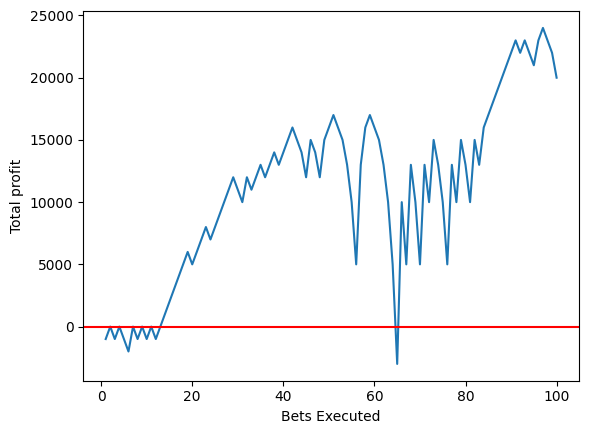

In [ ]:

betcount = np.arange(1, 101)
profits = []
startingBetAmount = 1000
currentBet = startingBetAmount
highestBet = 0 
profit = 0 
lowestProfit = 0
currentPos = 0


# just straight up calculate fibonacci up to the number of bets placed 
fibo = [1,1]
for i in range(len(betcount)):
    fibo.append(fibo[-1] + fibo[-2])

for i in range(len(betcount)):
    if (roulete_red_black()): # win
        profit += currentBet
        currentPos -= 2
        if (currentPos < 0): 
            currentPos = 0
        currentBet = startingBetAmount * fibo[currentPos]
    else: # lose
        profit -= currentBet
        currentPos += 1
        currentBet = startingBetAmount * fibo[currentPos]
    

    if profit < lowestProfit:
        lowestProfit = profit

    profits.append(profit)

    if (highestBet < currentBet):
        highestBet = currentBet

print("total bets: " + str(len(betcount)))
print("Total Profit: " + str(profit))
print("highest bet executed: " + str(highestBet) + " baht")
print("Most amount of money down: " + str(lowestProfit) + " baht")
moneyNeeded = -1*(lowestProfit - highestBet)
print("Money actually needed: " + str(moneyNeeded) + " baht")


plt.plot(betcount, profits)
plt.xlabel("Bets Executed")
plt.ylabel("Total profit")
plt.axhline(0, color="red")




## 3.1 Fibonacci analysis 

winners : 1000
losers  : 0
minimum number of bets: 100
maximum number of bets: 200


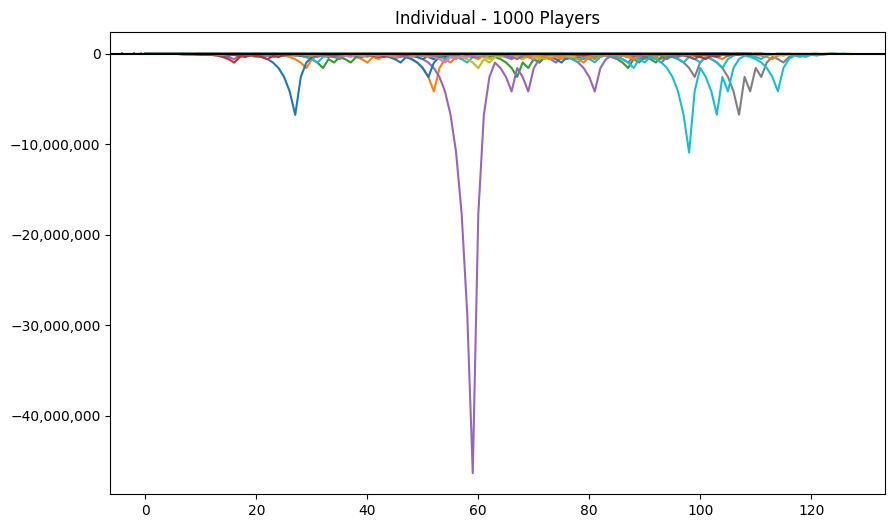

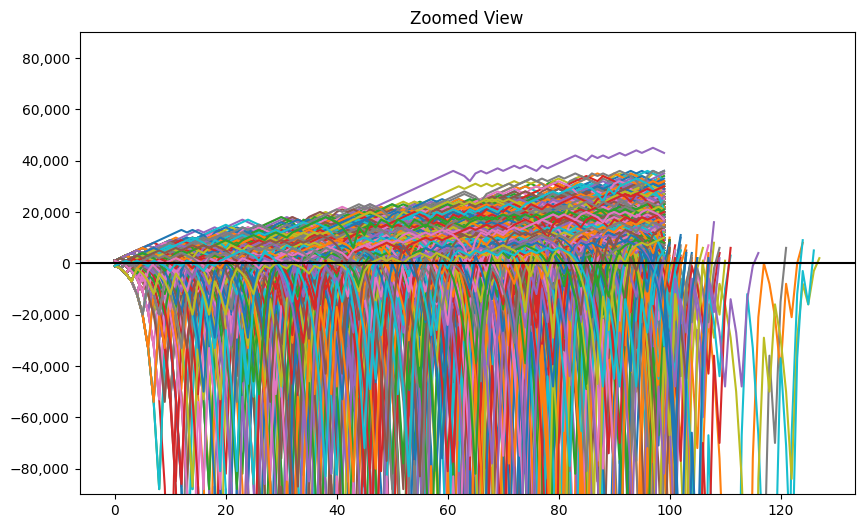

using number of bets: 100-200
Expected gain/loss using 1000 baht bets: 15821.0
or 15.82x initial bet


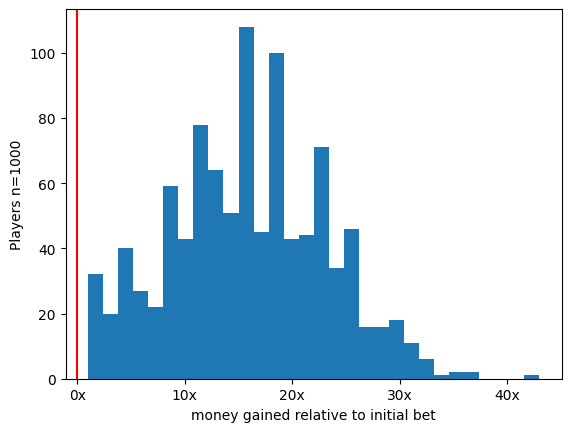

outliers mess up histogram, not as bad as martingale though


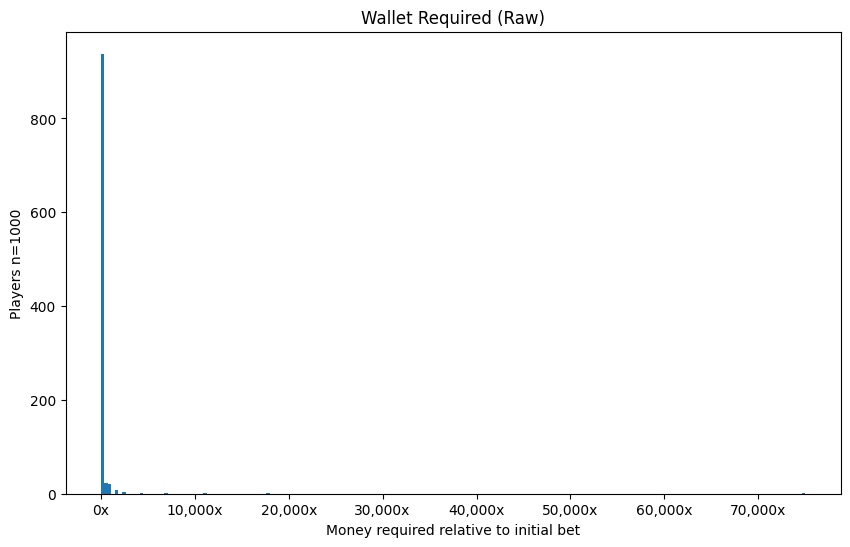

ENHANCE!!!


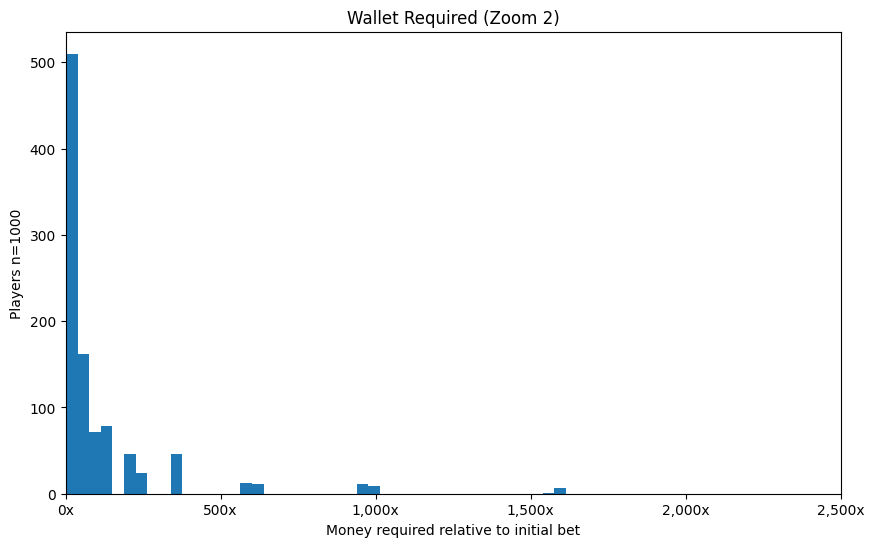

In [ ]:


fibo_list = [1, 1]
for _ in range(50): 
    fibo_list.append(fibo_list[-1] + fibo_list[-2])
fibo_array = np.array(fibo_list, dtype=np.int64)

@jit(nopython=True)
def modded_fiboStrat(startingBet: int, min_numberOfBets: int, max_numberOfBets: int, fibo_arr):
    profits = []
    startingBetAmount = startingBet
    currentBet = startingBetAmount
    highestBet = 0 
    profit = 0 
    moneyNeeded = 0
    currentPos = 0 # Index in the fibo

    for i in range(1, max_numberOfBets+1):
        if (profit - currentBet) < moneyNeeded:
            moneyNeeded = profit - currentBet

        if (roulete_red_black()): # win
            profit += currentBet
            currentPos -= 2
            if currentPos < 0:
                currentPos = 0
        else: # lose
            profit -= currentBet
            currentPos += 1
            

        if currentPos >= len(fibo_arr):
            currentPos = len(fibo_arr) - 1
            
        currentBet = startingBetAmount * fibo_arr[currentPos]

        profits.append(profit)

        if (highestBet < currentBet):
            highestBet = currentBet

        if i >= min_numberOfBets and profit > 0:
            return profits, abs(moneyNeeded)
        
    return profits, abs(moneyNeeded)

minimumBets = 100
maximumBets = 200
initialAmount = 1000
player_num = 1000

players = []
wallets_required = []

plt.figure(figsize=(10, 6))
for i in range(player_num):
    profits, moneyNeeded = modded_fiboStrat(initialAmount, minimumBets, maximumBets, fibo_array)
    players.append(profits)
    wallets_required.append(moneyNeeded/initialAmount)
    betsTracker = np.arange(0, len(profits))
    plt.plot(betsTracker, players[i])

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.axhline(0, color = 'black')
plt.title(f"Individual - {player_num} Players")

numberOfLosers = 0
for player in players:
    if (player[-1] < 0):
        numberOfLosers += 1

numberOfWinners = player_num - numberOfLosers
print("winners : " + str(numberOfWinners))
print("losers  : " + str(numberOfLosers))

final_results = [] 
for player in players:
    final_results.append(player[-1])
average_profit = sum(final_results) / len(final_results)

print("minimum number of bets: " + str(minimumBets))
print("maximum number of bets: " + str(maximumBets))

plt.show()

plt.figure(figsize=(10, 6))
for i in range(player_num):
    betsTracker = np.arange(0, len(players[i]))
    plt.plot(betsTracker, players[i])

plt.ylim(-90000, 90000) 
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.axhline(0, color = 'black')
plt.title("Zoomed View")
plt.show()

print("using number of bets: " + str(minimumBets) + "-" + str(maximumBets))
print("Expected gain/loss using " + str(initialAmount) + " baht bets: " +  str(average_profit))
print("or " + str(round(average_profit/initialAmount, 2)) + "x initial bet")

plt.hist([player[-1]/initialAmount for player in players], bins=30 );
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))
plt.axvline(0, color = "red");
plt.xlabel("money gained relative to initial bet")
plt.ylabel("Players n=" + str(player_num))
plt.show()



print("outliers mess up histogram, not as bad as martingale though")
plt.figure(figsize=(10, 6))
plt.hist([wallet for wallet in wallets_required], bins=int(player_num/5))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))
plt.xlabel("Money required relative to initial bet")
plt.ylabel("Players n=" + str(player_num))
plt.title("Wallet Required (Raw)")
plt.show()

print("ENHANCE!!!")
plt.figure(figsize=(10, 6))
plt.hist([wallet for wallet in wallets_required], bins=int(player_num*2))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))
plt.xlim(0, 2500)
plt.xlabel("Money required relative to initial bet")
plt.ylabel("Players n=" + str(player_num))
plt.title("Wallet Required (Zoom 2)")
plt.show()

In [ ]:
minimumBets = 100
maximumBets = 200
initialAmount = 1000
player_num = 10000

players = []
wallets_required = []

for i in range(player_num):
    profits, moneyNeeded = modded_fiboStrat(initialAmount, minimumBets, maximumBets, fibo_array)
    players.append(profits)
    
    wallets_required.append(abs(moneyNeeded)/initialAmount) 
    
    betsTracker = np.arange(0, len(profits))

chances = np.arange(70, 101, 1)
money_needed = np.percentile(wallets_required, chances)

df = pd.DataFrame({
    'Chance of Winning (%)': chances,
    'Money Needed': money_needed
})

df['Money Needed'] = df['Money Needed'].map('{:,.0f}x'.format)
print("sample size is : " + str(player_num) + " players")
print("Where minimum number of bets is :" + str(minimumBets))
print("Where maximum number of bets is :" + str(maximumBets))

wins = []
loses = []
for player in players:
    if player[-1] > 0:
        wins.append(player[-1])
    else:
        loses.append(player[-1])
print("average winners gain: " + str(round(np.sum(wins)/len(wins)/initialAmount, 2)) + "x")
print("average losers loss: your entire wallet")

df


sample size is : 10000 players
Where minimum number of bets is :100
Where maximum number of bets is :200
average winners gain: 15.7x
average losers loss: your entire wallet


,Chance of Winning (%),Money Needed
0,70,78x
1,71,80x
2,72,81x
3,73,83x
4,74,85x
5,75,86x
6,76,87x
7,77,121x
8,78,128x
9,79,131x


## 4. D'Alembert strategy

total bets: 100
Total Profit: 5000
highest bet executed: 11000 baht
Most amount of money down: -7000 baht
Money actually needed: 18000 baht


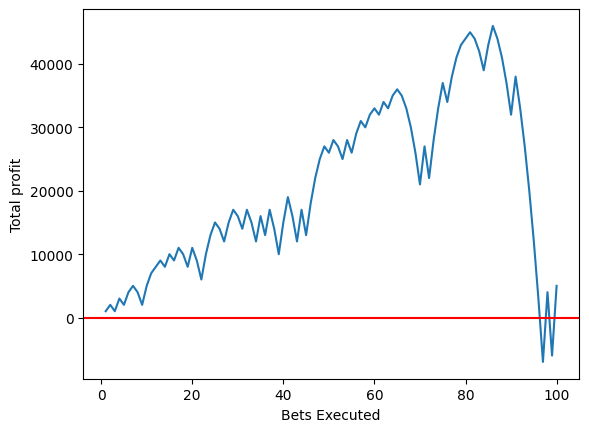

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def dalembert_strategy(initialAmount, minimumBets):
    betcount = np.arange(1, minimumBets+1)
    profits = []
    startingBetAmount = initialAmount
    currentBet = startingBetAmount
    highestBet = 0 
    profit = 0 
    lowestProfit = 0
    moneyNeeded = 0

    for i in range(len(betcount)):
        if (profit - currentBet) < moneyNeeded:
            moneyNeeded = profit - currentBet
        if (roulete_red_black()): # win
            profit += currentBet
            currentBet -= startingBetAmount
            if currentBet == 0:
                currentBet = startingBetAmount

        else: # lose
            profit -= currentBet
            currentBet += startingBetAmount
        

        if profit < lowestProfit:
            lowestProfit = profit
            
        profits.append(profit)

        if (highestBet < currentBet):
            highestBet = currentBet

    print("total bets: " + str(len(betcount)))
    print("Total Profit: " + str(profit))
    print("highest bet executed: " + str(highestBet) + " baht")
    print("Most amount of money down: " + str(lowestProfit) + " baht")
    print("Money actually needed: " + str(abs(moneyNeeded)) + " baht")
    
    return profits, moneyNeeded

initialAmount = 1000
bets = 100
profits, moneyNeeded = dalembert_strategy(initialAmount, bets)

plt.plot(np.arange(1,len(profits)+1), profits)
plt.xlabel("Bets Executed")
plt.ylabel("Total profit")
plt.axhline(0, color="red")
plt.show()





## 4.1 Stop while ahead

total bets: 100
Total Profit: 20000
highest bet executed: 13000 baht
Most amount of money down: -3000 baht
Money actually needed: 4000 baht


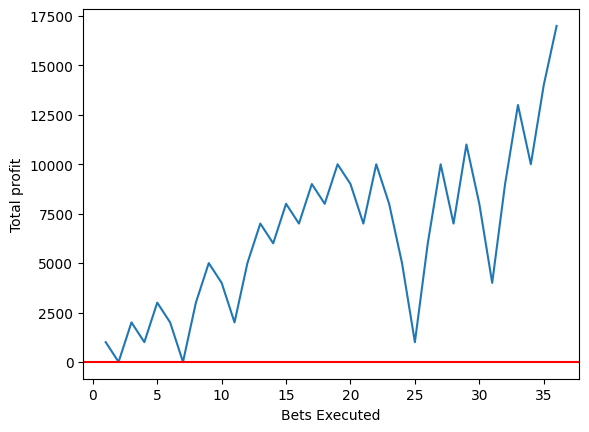

In [ ]:
def modded_dalembert_strategy(initialAmount, minimumBets, maximumBets):
    betcount = np.arange(1, maximumBets+1)
    profits = []
    startingBetAmount = initialAmount
    currentBet = startingBetAmount
    highestBet = 0 
    profit = 0 
    lowestProfit = 0
    moneyNeeded = 0

    for i in range(len(betcount)):
        if (profit - currentBet) < moneyNeeded:
            moneyNeeded = profit - currentBet
        if (roulete_red_black()): # win
            profit += currentBet
            currentBet -= startingBetAmount
            if currentBet == 0:
                currentBet = startingBetAmount

        else: # lose
            profit -= currentBet
            currentBet += startingBetAmount
        

        if profit < lowestProfit:
            lowestProfit = profit
            
        profits.append(profit)

        if (highestBet < currentBet):
            highestBet = currentBet

        if profit > initialAmount * (2 ** 4) and i >= minimumBets:
            return profits, abs(moneyNeeded)

    return profits, abs(moneyNeeded)

initialAmount = 1000
minimumBets = 10
maximumBets = 50
profits, moneyNeeded = modded_dalembert_strategy(initialAmount, minimumBets, maximumBets)

print("total bets: " + str(len(betcount)))
print("Total Profit: " + str(profit))
print("highest bet executed: " + str(highestBet) + " baht")
print("Most amount of money down: " + str(lowestProfit) + " baht")
print("Money actually needed: " + str(abs(moneyNeeded)) + " baht")

plt.plot(np.arange(1,len(profits)+1), profits)
plt.xlabel("Bets Executed")
plt.ylabel("Total profit")
plt.axhline(0, color="red")
plt.show()

## 4.2 Analysis

winners : 844
losers  : 156
minimum number of bets: 100
maximum number of bets: 300


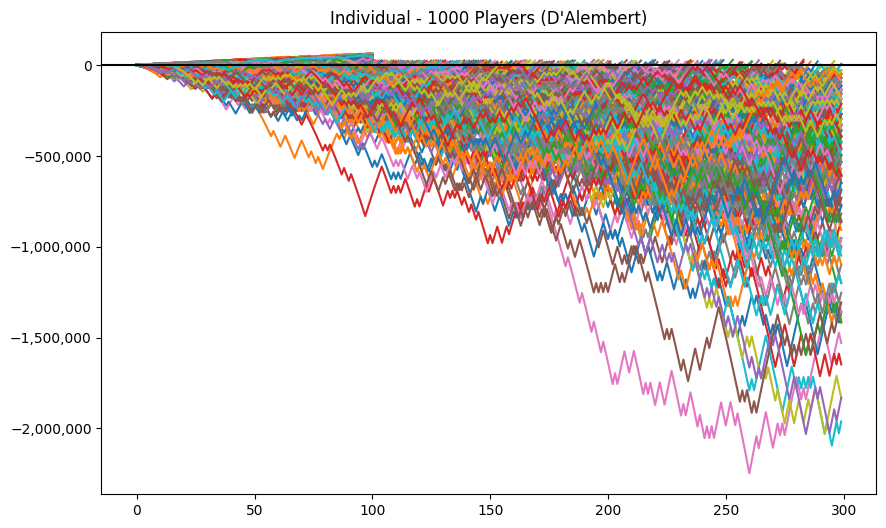

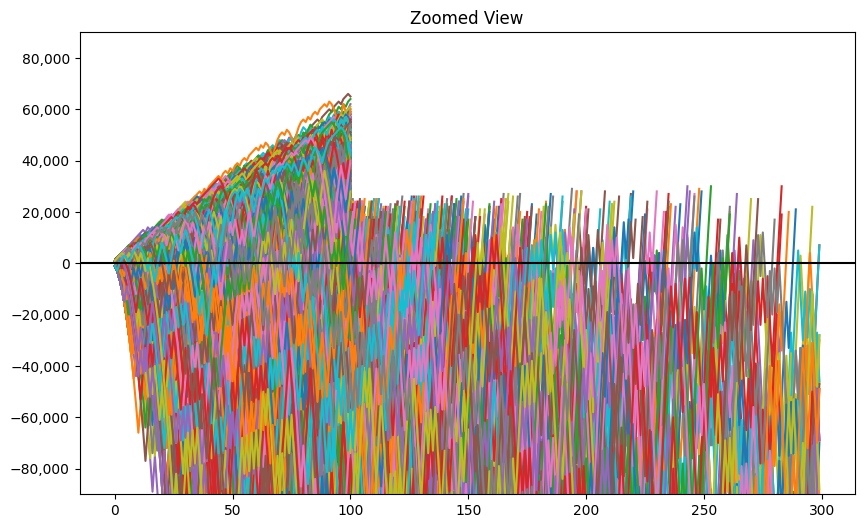

using number of bets: 100-300
Expected gain/loss using 1000 baht bets: -51697.0
Median gain/loss using 1000 baht bets: Median: 24000.0
or -51.7x initial bet


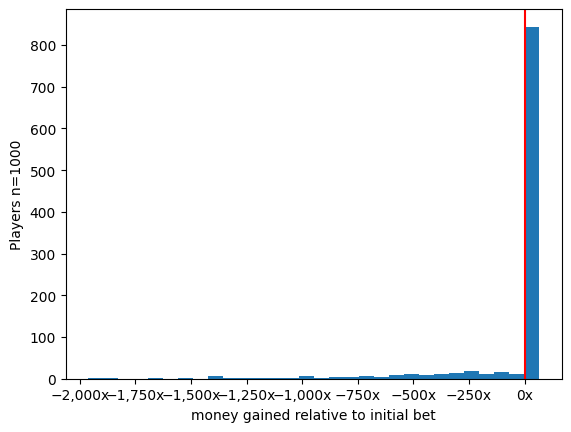

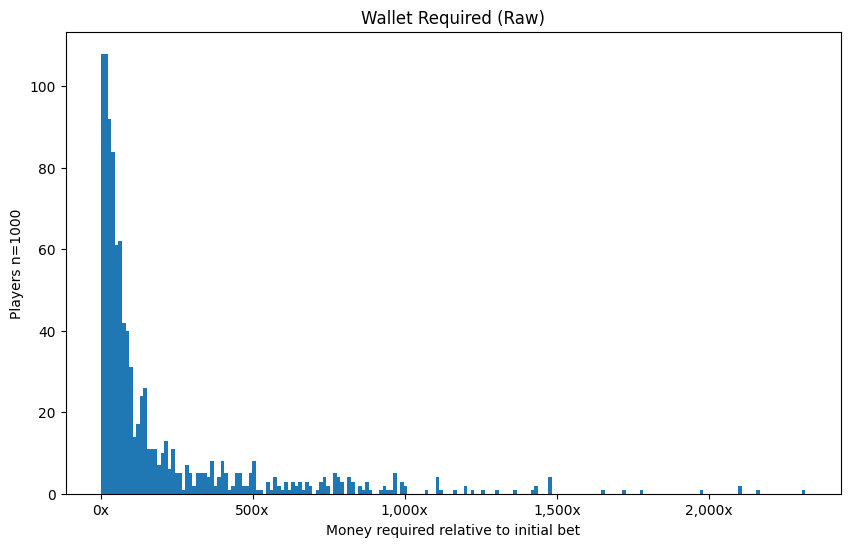

In [ ]:

minimumBets = 100
maximumBets = 300
initialAmount = 1000
player_num = 1000

players = []
wallets_required = []

# simulation
plt.figure(figsize=(10, 6))
for i in range(player_num):
    profits, moneyNeeded = modded_dalembert_strategy(initialAmount, minimumBets, maximumBets)
    players.append(profits)
    wallets_required.append(moneyNeeded/initialAmount)
    betsTracker = np.arange(0, len(profits))
    plt.plot(betsTracker, players[i])

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.axhline(0, color = 'black')
plt.title(f"Individual - {player_num} Players (D'Alembert)")

numberOfLosers = 0
for player in players:
    if (player[-1] < 0):
        numberOfLosers += 1

numberOfWinners = player_num - numberOfLosers
print("winners : " + str(numberOfWinners))
print("losers  : " + str(numberOfLosers))

final_results = [] 
for player in players:
    final_results.append(player[-1])
average_profit = sum(final_results) / len(final_results)

print("minimum number of bets: " + str(minimumBets))
print("maximum number of bets: " + str(maximumBets))

plt.show()

plt.figure(figsize=(10, 6))
for i in range(player_num):
    betsTracker = np.arange(0, len(players[i]))
    plt.plot(betsTracker, players[i])

plt.ylim(-90000, 90000) 
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.axhline(0, color = 'black')
plt.title("Zoomed View")
plt.show()

print("using number of bets: " + str(minimumBets) + "-" + str(maximumBets))
print("Expected gain/loss using " + str(initialAmount) + " baht bets: " +  str(average_profit))
print("Median gain/loss using " + str(initialAmount) + " baht bets: " +  "Median:", np.median(final_results) )

print("or " + str(round(average_profit/initialAmount, 2)) + "x initial bet")

plt.hist([player[-1]/initialAmount for player in players], bins=30 );
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))
plt.axvline(0, color = "red");
plt.xlabel("money gained relative to initial bet")
plt.ylabel("Players n=" + str(player_num))
plt.show()

plt.figure(figsize=(10, 6))
plt.hist([wallet for wallet in wallets_required], bins=int(player_num/5))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}x'))
plt.xlabel("Money required relative to initial bet")
plt.ylabel("Players n=" + str(player_num))
plt.title("Wallet Required (Raw)")
plt.show()


In [ ]:
minimumBets = 100
maximumBets = 150
initialAmount = 1000
player_num = 10000

players = []
wallets_required = []

for i in range(player_num):
    profits, moneyNeeded = modded_dalembert_strategy(initialAmount, minimumBets, maximumBets)
    players.append(profits)
    
    wallets_required.append(abs(moneyNeeded)/initialAmount) 
    
    betsTracker = np.arange(0, len(profits))

chances = np.arange(50, 101, 2)
money_needed = np.percentile(wallets_required, chances)

df = pd.DataFrame({
    'Chance of Not running out of money (%)': chances,
    'Money Needed': money_needed
})

df['Money Needed'] = df['Money Needed'].map('{:,.0f}x'.format)
print("sample size is : " + str(player_num) + " players")
print("Where minimum number of bets is :" + str(minimumBets))
print("Where maximum number of bets is :" + str(maximumBets))

wins = []
loses = []
for player in players:
    if player[-1] > 0:
        wins.append(player[-1])
    else:
        loses.append(player[-1])
print("average winners gain: " + str(round(np.sum(wins)/len(wins)/initialAmount, 2)) + "x")
print("average losers loss: " + str(round(np.sum(loses)/len(loses)/initialAmount, 2)) + "x")

df


sample size is : 10000 players
Where minimum number of bets is :100
Where maximum number of bets is :150
average winners gain: 34.77x
average losers loss: -191.48x


,Chance of Not running out of money (%),Money Needed
0,50,69x
1,52,73x
2,54,79x
3,56,85x
4,58,91x
5,60,99x
6,62,106x
7,64,114x
8,66,123x
9,68,134x


## 5. Final Showdown of all 6 gambling methods 
* 1. No strategy
* 2. Martingale 
* 3. Paroli 
* 4. Fibonacci 
* 5. D'Alembert 
* 6. No gambling at all

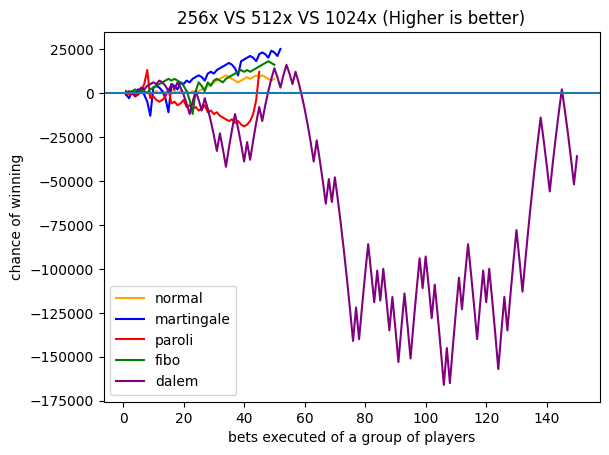


Final Ranking (Highest to Lowest Profit):
1. Martingale: $25000
2. Fibo: $16000
3. Paroli: $12000
4. Normal: $8000
5. No Gambling: $0
6. Dalembert: $-36000

Money Needed Ranking:
1. No Gambling: $0
2. Normal: $2000
3. Paroli: $20000
4. Fibo: $25000
5. Martingale: $29000
6. Dalembert: $187000


In [ ]:
minimumBets = 50
maximumBets = 150
initialAmount = 1000
fibo_list = [1, 1]
for _ in range(50): 
    fibo_list.append(fibo_list[-1] + fibo_list[-2])
fibo_array = np.array(fibo_list, dtype=np.int64)

n_p, n_n = normalStrategy(initialAmount, minimumBets)
m_p, m_n = modifiedMartingaleStrategy(initialAmount, minimumBets, maximumBets)
p_p, p_n = modded_paroli_strat(initialAmount, minimumBets, maximumBets)
f_p, f_n = modded_fiboStrat(initialAmount, minimumBets, maximumBets, fibo_list)
d_p, d_n = modded_dalembert_strategy(initialAmount, minimumBets, maximumBets)
no_p, no_n = [0,0,0], 0 

plt.title("256x VS 512x VS 1024x (Higher is better)")
plt.plot( np.arange(1, len(n_p)+1), n_p, label="normal" , color = 'orange') 
plt.plot( np.arange(1, len(m_p)+1), m_p, label="martingale", color = 'blue')
plt.plot( np.arange(1, len(p_p)+1), p_p, label="paroli", color = 'red')
plt.plot( np.arange(1, len(f_p)+1), f_p, label="fibo", color = 'green')
plt.plot( np.arange(1, len(d_p)+1), d_p, label="dalem", color = 'purple')
plt.legend()
plt.xlabel("bets executed of a group of players")
plt.ylabel("chance of winning")
plt.axhline(0)
plt.show()




# ranking by profits
ranking = []
names = ["Normal", "Martingale", "Paroli", "Fibo", "Dalembert", "No Gambling"]
methods = [n_p, m_p, p_p, f_p, d_p, no_p]

for i in range(5, -1, -1):
    for j in range(i):
        if methods[j][-1] < methods[j+1][-1]:
            methods[j], methods[j+1] = methods[j+1], methods[j]
            names[j], names[j+1] = names[j+1], names[j]

for k in range(len(methods)):
    ranking.append(f"{k+1}. {names[k]}: ${methods[k][-1]}")

print("\nFinal Ranking (Highest to Lowest Profit):")
for rank in ranking:
    print(rank)

# ranking by money needed
needed_ranking = []
needed_names = ["Normal", "Martingale", "Paroli", "Fibo", "Dalembert", "No Gambling"]
needed_values = [n_n, m_n, p_n, f_n, d_n, no_n]

for i in range(5, -1, -1):
    for j in range(i):
        if needed_values[j] > needed_values[j+1]:
            needed_values[j], needed_values[j+1] = needed_values[j+1], needed_values[j]
            needed_names[j], needed_names[j+1] = needed_names[j+1], needed_names[j]

for k in range(len(needed_values)):
    needed_ranking.append(f"{k+1}. {needed_names[k]}: ${needed_values[k]}")

print("\nMoney Needed Ranking:")
for rank in needed_ranking:
    print(rank)

## Overall Winner (Realistically)

In [ ]:
players = 100_000
minimumBets = 50
maximumBets = 100
initialAmount = 1000

fibo = [1, 1]
for _ in range(50):
    fibo.append(fibo[-1] + fibo[-2])

norm_sum = []
mart_sum = []
paroli_sum = []
fibo_sum = []
dale_sum = []

norm_need = []
mart_need = []
paroli_need = []
fibo_need = []
dale_need = []

for _ in range(players):
    n_p, n_n = normalStrategy(initialAmount, minimumBets)
    m_p, m_n = modifiedMartingaleStrategy(initialAmount, minimumBets, maximumBets)
    p_p, p_n = modded_paroli_strat(initialAmount, minimumBets, maximumBets)
    f_p, f_n = modded_fiboStrat(initialAmount, minimumBets, maximumBets, fibo)
    d_p, d_n = modded_dalembert_strategy(initialAmount, minimumBets, maximumBets)

    norm_sum.append(n_p[-1])
    mart_sum.append(m_p[-1]) 
    paroli_sum.append(p_p[-1])
    fibo_sum.append(f_p[-1])
    dale_sum.append(d_p[-1])

    norm_need.append(n_n)
    mart_need.append(m_n)
    paroli_need.append(p_n)
    fibo_need.append(f_n)
    dale_need.append(d_n)


profits = {
    "Normal": np.mean(norm_sum),
    "Martingale": np.mean(mart_sum),
    "Paroli": np.mean(paroli_sum),
    "Fibo": np.mean(fibo_sum),
    "Dalembert": np.mean(dale_sum),
    "No Gambling": 0
}

print("\nFinal Ranking (AVERAGE Profit):")
for i, (name, value) in enumerate(sorted(profits.items(), key=lambda x: x[1], reverse=True), 1):
    print(f"{i}. {name}: ${value:.2f}")

profits = {
    "Normal": np.median(norm_sum),
    "Martingale": np.median(mart_sum),
    "Paroli": np.median(paroli_sum),
    "Fibo": np.median(fibo_sum),
    "Dalembert": np.median(dale_sum),
    "No Gambling": 0
}

print("\nFinal Ranking (MEDIAN Profit):")
for i, (name, value) in enumerate(sorted(profits.items(), key=lambda x: x[1], reverse=True), 1):
    print(f"{i}. {name}: ${value:.2f}")


needed = {
    "Normal": np.mean(norm_need),
    "Martingale": np.mean(mart_need),
    "Paroli": np.mean(paroli_need),
    "Fibo": np.mean(fibo_need),
    "Dalembert": np.mean(dale_need),
    "No Gambling": 0
}

print("\nMoney Needed Ranking AVERAGE (lower money is best):")
for i, (name, value) in enumerate(sorted(needed.items(), key=lambda x: x[1]), 1):
    print(f"{i}. {name}: ${value:.2f}")


needed = {
    "Normal": np.median(norm_need),
    "Martingale": np.median(mart_need),
    "Paroli": np.median(paroli_need),
    "Fibo": np.median(fibo_need),
    "Dalembert": np.median(dale_need),
    "No Gambling": 0
}

print("\nMoney Needed Ranking MEDIAN (median money is best):")
for i, (name, value) in enumerate(sorted(needed.items(), key=lambda x: x[1]), 1):
    print(f"{i}. {name}: ${value:.2f}")



Final Ranking (AVERAGE Profit):
1. Martingale: $24828.96
2. Fibo: $5711.94
3. No Gambling: $0.00
4. Normal: $-1367.48
5. Paroli: $-3991.34
6. Dalembert: $-13312.19

Final Ranking (MEDIAN Profit):
1. Martingale: $25000.00
2. Dalembert: $19000.00
3. Paroli: $13000.00
4. Fibo: $7000.00
5. No Gambling: $0.00
6. Normal: $-2000.00

Money Needed Ranking AVERAGE (lower money is best):
1. No Gambling: $0.00
2. Normal: $6815.44
3. Paroli: $30041.82
4. Dalembert: $75848.18
5. Fibo: $249591.70
6. Martingale: $694685.83

Money Needed Ranking MEDIAN (median money is best):
1. No Gambling: $0.00
2. Normal: $6000.00
3. Fibo: $18000.00
4. Paroli: $26000.00
5. Dalembert: $37000.00
6. Martingale: $52000.00


## So these gambling strategies kinda works?

* The median tells you what usually happens.
* The mean tells you what inevitably happens over time.